In [1]:
import os
import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
DATA_DIR = os.path.join(lib.basic.DATA_DIR(), 'myelin_grad')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
regions = ['cb', 'cc', 'sc']
map_funcs = [lib.myelin.get_cb_map, lib.myelin.get_cc_map, lib.myelin.get_sc_map]

# # Generating myelination maps
# maps = {region: lib.myelin.get_maps_of_all_subs(map_func) for region, map_func in zip(regions, map_funcs)}

# # Write output to pickle file
# for region in maps:
#     maps[region].to_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle'))

In [3]:
# Loading myelination maps
maps = {region: pd.read_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle')) for region in regions}

# Gradient analysis
basic_grad_results, time_profiles, time_profiles_mean = {}, {}, {}
for region in regions:
    _, grad_pca = lib.grad.basic_grad_pca(maps[region])
    basic_grad_results[region] = grad_pca
    time_profiles[region] = lib.grad.get_time_profile(basic_grad_results[region])
    time_profiles_mean[region] = np.row_stack(time_profiles[region]['mean'])

n_voxel: 17853
Descriptive result of n_outliers: 
DescribeResult(nobs=219, minmax=(46, 1727), mean=324.4840182648402, variance=41748.96648653178, skewness=3.7273960452954635, kurtosis=18.533708909477017)
n_voxel: 59412
Descriptive result of n_outliers: 
DescribeResult(nobs=219, minmax=(184, 1496), mean=581.0365296803653, variance=60115.9711365255, skewness=0.8444470462341523, kurtosis=0.6375889502770997)
n_voxel: 14017
Descriptive result of n_outliers: 
DescribeResult(nobs=219, minmax=(2, 639), mean=38.3013698630137, variance=3023.46839261028, skewness=7.338406693461668, kurtosis=69.86016471169604)


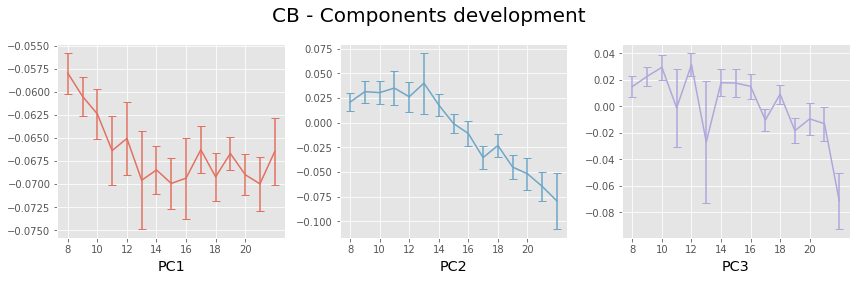

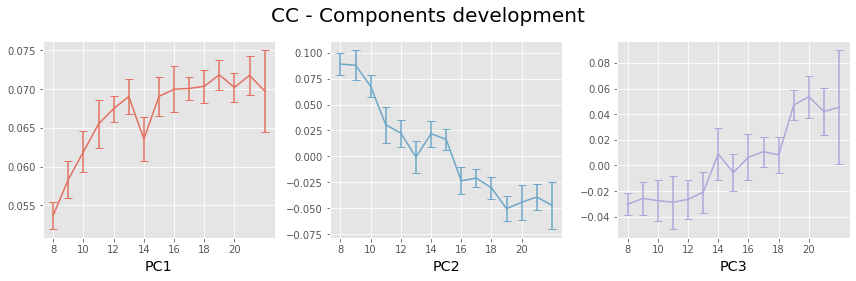

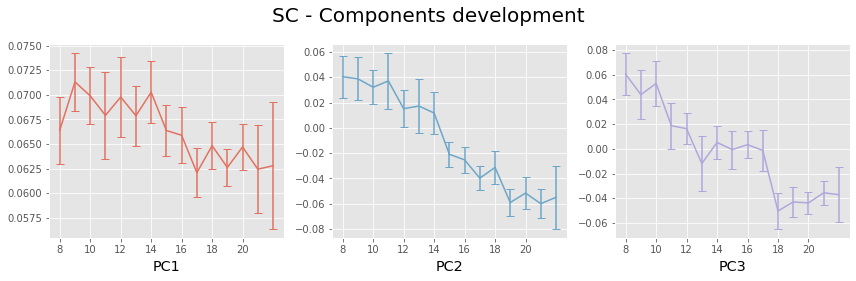

In [4]:
# Plots
for region in regions:
    lib.grad.plot_time_profile(time_profiles[region], n_comp=3, roi_name=region.upper())

# Quantative comparison on PC1/PC2

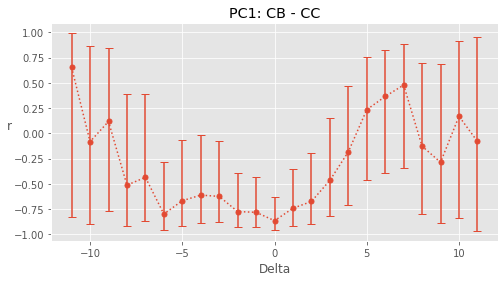

In [5]:
corr_results = lib.util.corr_func(time_profiles_mean['cb'][:, 0], time_profiles_mean['cc'][:, 0])
lib.util.plot_corr_func(corr_results, 'PC1: CB - CC')

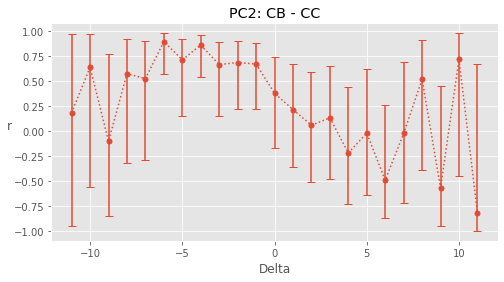

In [6]:
corr_results = lib.util.corr_func(time_profiles_mean['cb'][:, 0], time_profiles_mean['sc'][:, 0])
lib.util.plot_corr_func(corr_results, 'PC2: CB - CC')

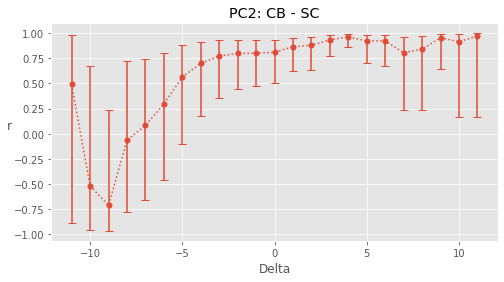

In [7]:
corr_results = lib.util.corr_func(time_profiles_mean['cb'][:, 1], time_profiles_mean['cc'][:, 1])
lib.util.plot_corr_func(corr_results, 'PC2: CB - SC')

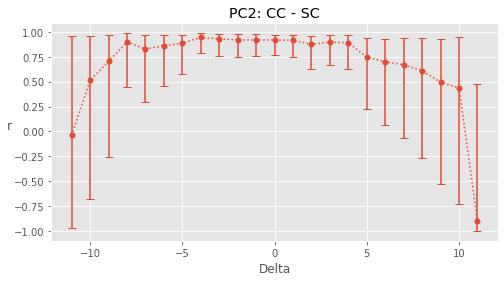

In [8]:
corr_results = lib.util.corr_func(time_profiles_mean['cc'][:, 1], time_profiles_mean['sc'][:, 1])
lib.util.plot_corr_func(corr_results, 'PC2: CC - SC')